# Mall Customer Segmentation 
## The owner of the mall wants you to create categories of customer to pitch in upselling the products and providing discount vouchers

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Rules /Guidelines for Clustering Use-cases
# 1. Only Target Numeric Columns (Age, Annual Income, SpendingScore). Ensure Your data is complete 
#    and valid
# 2. Perform Visual EDA on numerical columns


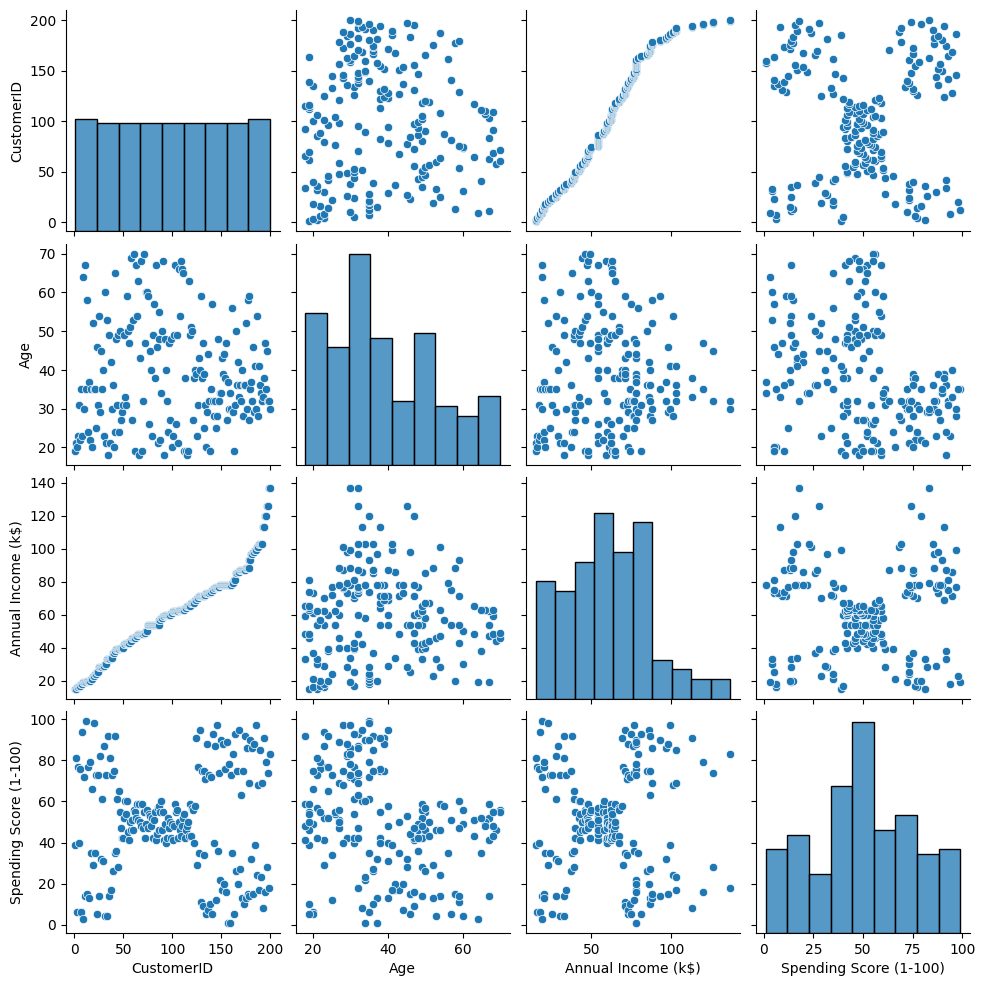

In [4]:
sns.pairplot(data)

In [ ]:
#For Example
#1. Create Cluster using SpendingScore v/s Age (k = 2)
#2. Create Cluster using SpendingScore v/s Annual Income (k=5)

In [5]:
#2. Create Cluster using SpendingScore v/s Annual Income (k=5)

features = data.iloc[:,[3,4]].values


In [6]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)

In [7]:
model.fit(features)

/Users/maryam/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [8]:
labelData = model.predict(features)

In [9]:
finalDataset = pd.DataFrame(features,columns=['AnnualIncome','SpendingScore'])

In [10]:
finalDataset['category']=labelData

In [11]:
finalDataset.head()

,AnnualIncome,SpendingScore,category
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


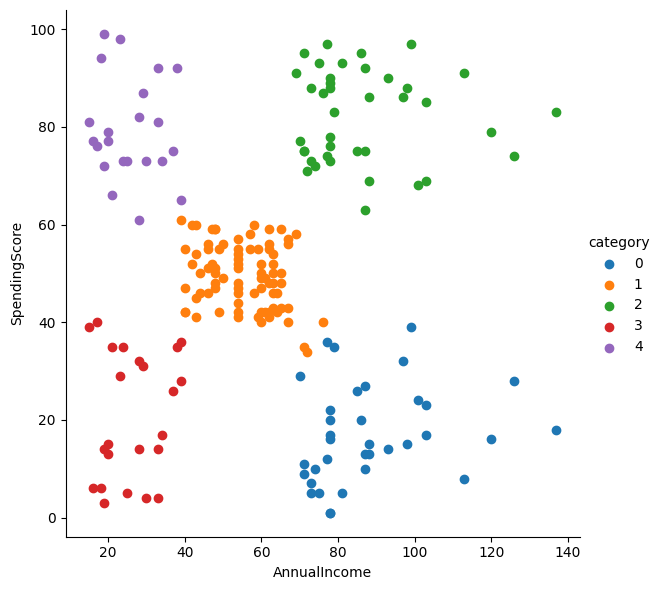

In [13]:
sns.FacetGrid(finalDataset, hue='category', height=6)\
.map(plt.scatter,'AnnualIncome','SpendingScore')\
.add_legend()

/Users/maryam/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maryam/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maryam/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/maryam/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

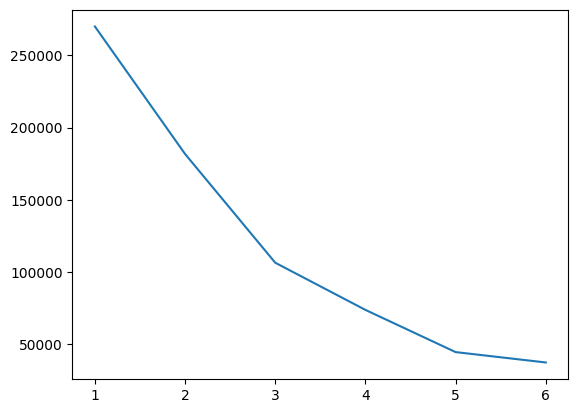

In [14]:
#Verify whether the value of K is an ideal value or not

#Elbow Method --- Metric WCSS (Within Cluster Sum of Square)
wcss = []
for i in range(1,7):
    modelCheck = KMeans(n_clusters=i)
    modelCheck.fit(features)
    wcss.append(modelCheck.inertia_)
    
plt.plot(range(1,7),wcss)

In [ ]:
# k= 5
# KMeans
# 1. To fill missing labels
# 2. To Convert Multiclass classification use-case to Binary class usecase
# 3. We can create prediction model post kmeans using classification

In [16]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
#2. Create Cluster using SpendingScore v/s Annual Income (k=5)

features = data.iloc[:,1:4].values

In [53]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
fAge = ohe.fit_transform(features[:,1:2].reshape(-1,1))
features = np.concatenate([fAge, np.array(data.iloc[:,2:5])], axis = 1)

features

array([[  0.,   1.,  19.,  15.,  39.],
       [  1.,   0.,  21.,  15.,  81.],
       [  1.,   0.,  20.,  16.,   6.],
       [  1.,   0.,  23.,  16.,  77.],
       [  1.,   0.,  31.,  17.,  40.],
       [  1.,   0.,  22.,  17.,  76.],
       [  1.,   0.,  35.,  18.,   6.],
       [  1.,   0.,  23.,  18.,  94.],
       [  1.,   0.,  64.,  19.,   3.],
       [  1.,   0.,  30.,  19.,  72.],
       [  1.,   0.,  67.,  19.,  14.],
       [  1.,   0.,  35.,  19.,  99.],
       [  1.,   0.,  58.,  20.,  15.],
       [  1.,   0.,  24.,  20.,  77.],
       [  1.,   0.,  37.,  20.,  13.],
       [  1.,   0.,  22.,  20.,  79.],
       [  1.,   0.,  35.,  21.,  35.],
       [  1.,   0.,  20.,  21.,  66.],
       [  1.,   0.,  52.,  23.,  29.],
       [  1.,   0.,  35.,  23.,  98.],
       [  1.,   0.,  35.,  24.,  35.],
       [  1.,   0.,  25.,  24.,  73.],
       [  1.,   0.,  46.,  25.,   5.],
       [  1.,   0.,  31.,  25.,  73.],
       [  1.,   0.,  54.,  28.,  14.],
       [  1.,   0.,  29.,

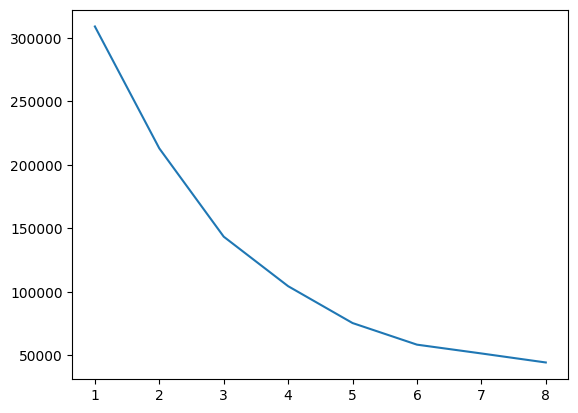

In [71]:
#Verify whether the value of K is an ideal value or not
import warnings
warnings.filterwarnings('ignore')

#Elbow Method --- Metric WCSS (Within Cluster Sum of Square)
wcss = []
for i in range(1,9):
    modelCheck = KMeans(n_clusters=i)
    modelCheck.fit(features)
    wcss.append(modelCheck.inertia_)
    
plt.plot(range(1,9),wcss)

In [72]:
from sklearn.cluster import KMeans
modelElbow = KMeans(n_clusters=6)

In [73]:
modelElbow.fit(features)

KMeans(n_clusters=6)

In [57]:
labelData = modelElbow.predict(features)

In [59]:
finalDataset = pd.DataFrame(features,columns=['Female','Male','Age','AnnualIncome','SpendingScore'])

In [60]:
finalDataset['category']=labelData

In [61]:
finalDataset.head()

,Female,Male,Age,AnnualIncome,SpendingScore,category
0,0.0,1.0,19.0,15.0,39.0,0
1,1.0,0.0,21.0,15.0,81.0,5
2,1.0,0.0,20.0,16.0,6.0,0
3,1.0,0.0,23.0,16.0,77.0,5
4,1.0,0.0,31.0,17.0,40.0,0


In [62]:
finalDataset.tail()

,Female,Male,Age,AnnualIncome,SpendingScore,category
195,1.0,0.0,35.0,120.0,79.0,2
196,1.0,0.0,45.0,126.0,28.0,3
197,1.0,0.0,32.0,126.0,74.0,2
198,1.0,0.0,32.0,137.0,18.0,3
199,1.0,0.0,30.0,137.0,83.0,2


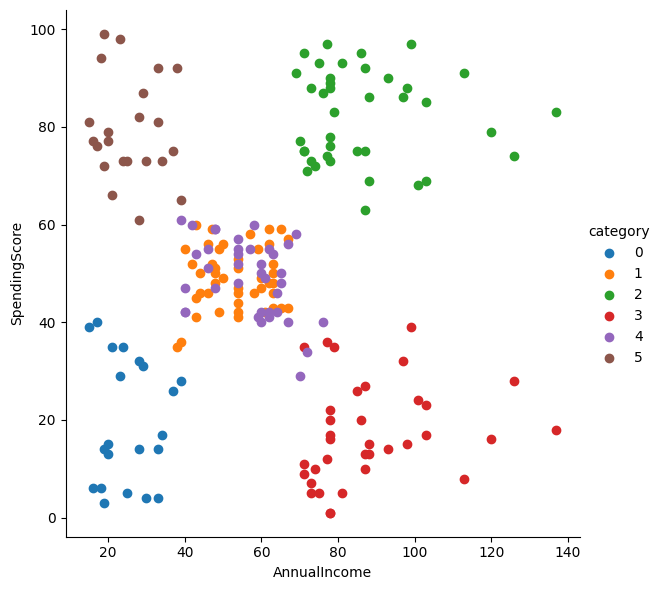

In [63]:
sns.FacetGrid(finalDataset, hue='category', height=6)\
.map(plt.scatter,'AnnualIncome','SpendingScore')\
.add_legend()